## MNIST classification NN

In [155]:
import torch
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import random
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torch.utils.data import DataLoader
torch.__version__

'2.9.1'

In [156]:
COLOR_NEUTRAL = '#344c63'
COLOR_GOOD = '#62cc7e'
COLOR_BAD = '#cf4d46' 

TRAIN_BATCH_SIZE = 512
TRAIN_EPOCHS = 20
INTERPRETATION_BATCH_SIZE = 10

In [157]:
dataset_train = datasets.MNIST("data", download=True, train=True, transform=transforms.ToTensor())
dataset_test = datasets.MNIST("data", download=True, train=False, transform=transforms.ToTensor())

x_train, y_train = dataset_train.data.to(dtype=torch.float), dataset_train.targets
x_test, y_test = dataset_test.data.to(dtype=torch.float), dataset_test.targets

softmax = nn.Softmax(dim=0)
relu = nn.ReLU()

plt.rcParams['image.cmap'] = 'gray'

### Displaying a random image

2


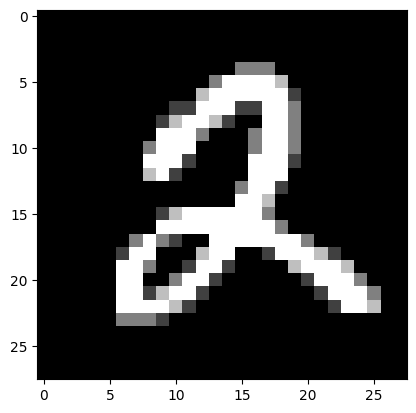

In [158]:
n = random.randint(0, len(x_train))
plt.imshow(x_train[n])
print(y_train[n].item())

In [159]:
x_train[0].shape

torch.Size([28, 28])

### Classifier architecture


In [160]:
class MNISTClassifier(torch.nn.Module):
    def __init__(self, channels=8, kernel_size=5, stride=1, pool_size=2, pool_stride=2):
        super(MNISTClassifier, self).__init__()
        self.in_channels = 1  # MNIST pictures are grayscale 

        self.pipeline = torch.nn.Sequential(
            nn.Conv2d(1, 8, 5, 1, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(2, 2),
            nn.Conv2d(8, 16, 5, 1, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(3, 3),
            nn.Flatten(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        return self.pipeline(x)

In [161]:
classifier = MNISTClassifier()

### Predictions on untrained model
Each time a prediction of a sample from test dataset runs, the original picture and probits (softmaxed logits) are displayed

The correct label is displayed with accent color

[0.09358517080545425, 0.03099074959754944, 0.001044371398165822, 0.008059917017817497, 0.006881154607981443, 0.7109363079071045, 0.026150435209274292, 0.026348857209086418, 0.09600017964839935, 2.790925918816356e-06]


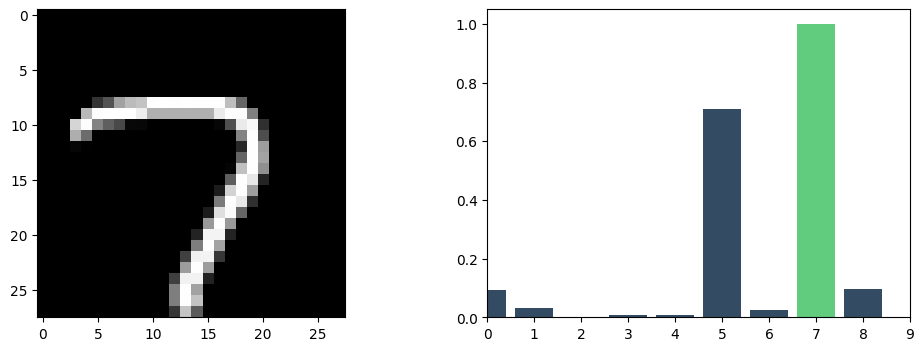

In [162]:
def predict_random_from_train(net: torch.nn.Module, apply_softmax=True): 
    with torch.no_grad():
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        n = random.randint(0, len(x_train))
        ax[0].imshow(x_train[n])
        y_sample = (net.forward(x_train[n].unsqueeze(0).unsqueeze(0))).squeeze()
        y_sample = softmax(y_sample) if apply_softmax else y_sample 

        ax[1].bar(x=torch.arange(10), height=y_sample, color=COLOR_NEUTRAL)
        ax[1].bar(x=y_train[n], height=1)

        ax[1].set_xlim(0, 9)
        
    return y_sample


def predict_random_from_test(net: torch.nn.Module, apply_softmax=True): 
    with torch.no_grad():
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        n = random.randint(0, len(x_test))
        ax[0].imshow(x_test[n])
        y_sample = ((net.forward(x_test[n].unsqueeze(0).unsqueeze(0))).squeeze())
        y_sample = softmax(y_sample) if apply_softmax else y_sample 

        ax[1].bar(x=torch.arange(10), height=y_sample, color=COLOR_NEUTRAL)
        ax[1].bar(x=y_test[n], height=1, color=COLOR_GOOD)

        ax[1].set_xlim(0, 9)
        
    return y_sample 

y_sample = predict_random_from_test(classifier, apply_softmax=True)
print(y_sample.tolist())

### Prediction for all train data

In [163]:
def predict(net: torch.nn.Module, x): 
    return net.forward(x.unsqueeze(1))

with torch.no_grad():
    print(softmax(predict(classifier, x_train).squeeze()))

tensor([[2.7832e-07, 2.9976e-07, 5.9064e-10,  ..., 2.4502e-04, 1.7172e-05,
         7.4525e-06],
        [4.4635e-07, 6.3347e-08, 3.2532e-06,  ..., 2.8074e-06, 1.3953e-06,
         3.8928e-05],
        [8.5499e-08, 1.3472e-06, 7.9988e-08,  ..., 1.4698e-08, 6.9977e-07,
         6.1398e-09],
        ...,
        [8.5764e-06, 4.5244e-05, 2.9843e-10,  ..., 7.3379e-05, 5.9791e-07,
         2.4987e-06],
        [2.0511e-07, 2.1211e-07, 1.7384e-06,  ..., 2.2411e-07, 2.6117e-06,
         6.3918e-06],
        [6.2330e-07, 8.7698e-07, 3.7282e-06,  ..., 3.4935e-06, 2.0062e-07,
         7.4856e-06]])


### Training
Currently using Adam optimizer with processing 512 elements per epoch, 20 epochs help the model achieve quite high accuracy

epoch 0, loss 0.26599396188976243
epoch 1, loss 0.09011377964634448
epoch 2, loss 0.06705834658350796
epoch 3, loss 0.05431873447378166
epoch 4, loss 0.045861898819566704
epoch 5, loss 0.04113273505936377
epoch 6, loss 0.03702940639050212
epoch 7, loss 0.03433532851340715
epoch 8, loss 0.0317791270208545
epoch 9, loss 0.029346479612286203
epoch 10, loss 0.027447245331131853
epoch 11, loss 0.02624088982702233
epoch 12, loss 0.024473421326547395
epoch 13, loss 0.02341738747054478
epoch 14, loss 0.022345612735080067
epoch 15, loss 0.021631308089126833
epoch 16, loss 0.020404795417562127
epoch 17, loss 0.019649931200547144
epoch 18, loss 0.01903175428014947
epoch 19, loss 0.018288536040927283


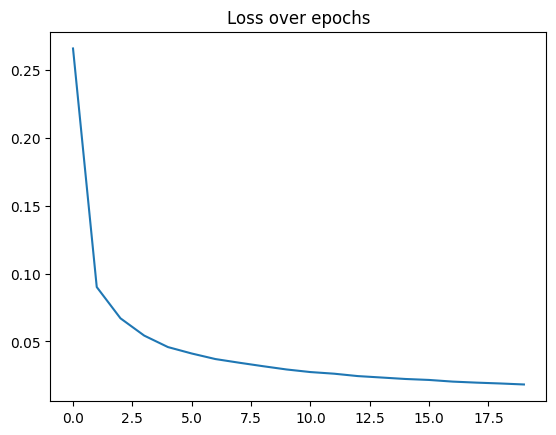

In [164]:
def fit(classifier, epochs=20, verbose=True):
    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0)
    loss = nn.CrossEntropyLoss()

    history = []
    train_loader = DataLoader(dataset_train, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=2)

    for epoch in range(0, epochs):
        epoch_loss = 0

        for x_batch, y_true_batch in train_loader:
            optimizer.zero_grad()
            logits = classifier.forward(x_batch)
            
            loss_val = loss(logits, y_true_batch)
            loss_val.backward()
            
            optimizer.step()
            epoch_loss += loss_val.item()

        epoch_loss /= train_loader.batch_size
        history.append(epoch_loss)

        if verbose:
            print(f'epoch {epoch}, loss {epoch_loss}')
    
    return history

history = fit(classifier, TRAIN_EPOCHS)

plt.title("Loss over epochs")
plt.plot(torch.arange(0, TRAIN_EPOCHS), history)

In [165]:
def calculate_accuracy(classifier, x_test, y_test):
    with torch.no_grad():
        predicted = torch.argmax(classifier.forward(x_test.unsqueeze(1)), dim=1)
        accuracy = ((predicted == y_test).sum() / y_test.shape[0]).item()
    return accuracy
    
calculate_accuracy(classifier, x_test, y_test)

0.9715999960899353

### Getting activation maps 
The Grad-CAM approach uses activation maps of the last Conv2d layer.

To get them, we register a hook, so every forward pass will lead to ```def hook(model, input, output)``` call.

Actually, the data also contains gradients after backward pass, but we will not use it.

In [166]:
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach().squeeze(0)
    return hook

classifier.pipeline[3].register_forward_hook(get_activation('conv2'))

### Building heatmap

The Grad-CAM approach works with derivatives of logits w.r.t. last Conv2d layer neurons. 

Here the last linear layer neurons are used, because their gradients are same to Conv2d layer gradients

Assuming the last layer to have shape (4, 4, 16), we then flatten it to (1, 256), so mean sum of them (used for alpha coefficients) can be retrieved quite easily 

The last operation here is linear combination of 16 activation maps with coefficients got on the previous step

In [167]:
def build_heatmap(net, image: Tensor, c=0):
    y = net.forward(image)
    y_c = y[0][c]
    y_c.backward()

    d_yc_d_linear = classifier.pipeline[-1].weight.grad[c]
    d_yc_d_Map = lambda k: d_yc_d_linear[16 * (k - 1) : 16 * k - 1]
    
    alpha_c = torch.zeros(16)
    heatmap = torch.zeros_like(activation['conv2'][0])
    for k in range(16):
        alpha_c[k] = d_yc_d_Map(k).mean()
        activation_map = activation['conv2'][k]
        heatmap += alpha_c[k].item() * activation_map
        
    return relu(heatmap).detach()

### Interpretation

Here we have a batch of 10 random images, each picture contains original image, heatmap (in negative colormap), Grad-CAM heatmap put on image and prediction data (logits)

It's important to mention that heatmaps are scaled up as originally they have shape (14, 14) which is smaller than the original picture (28, 28). Bicubic interpolation is used here, so the regions heatmap has effect on are displayed more precisely

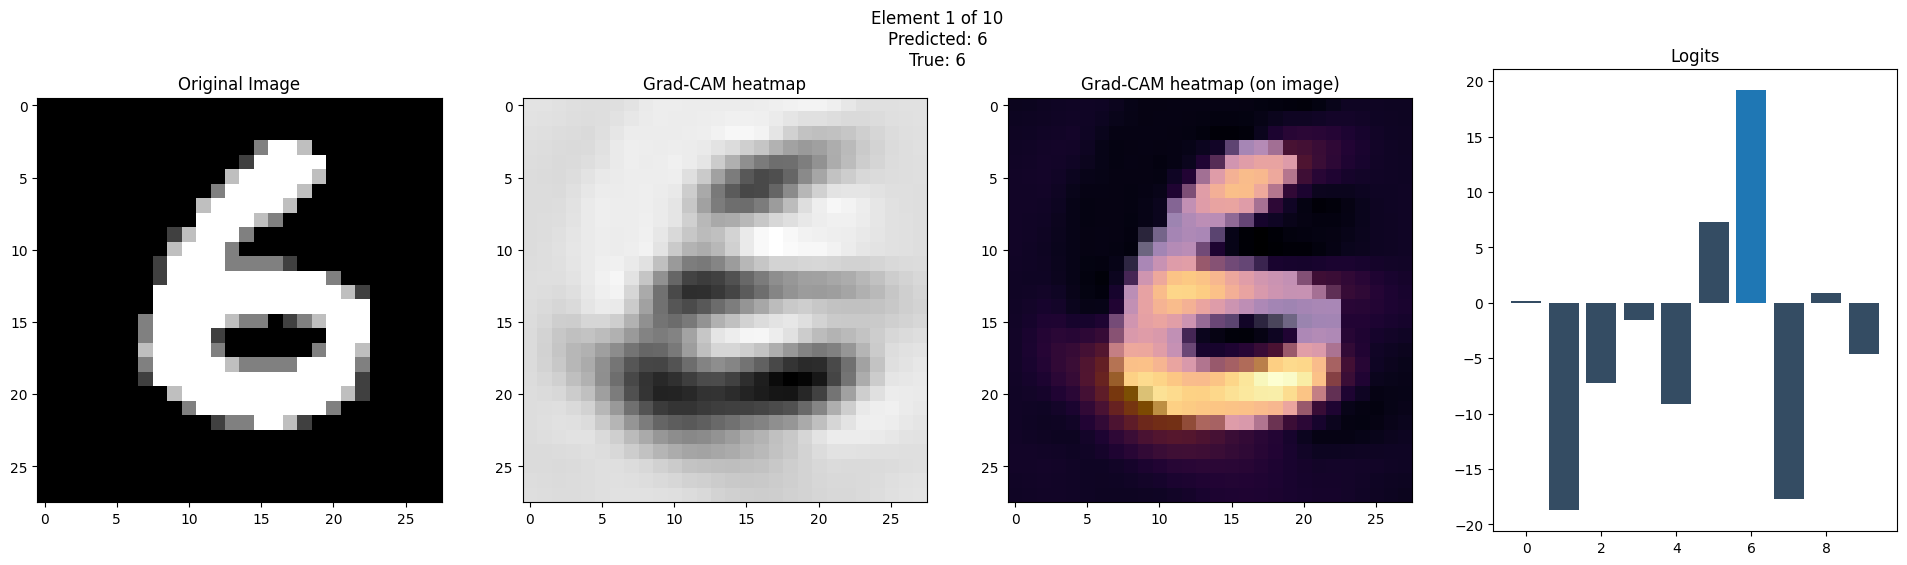

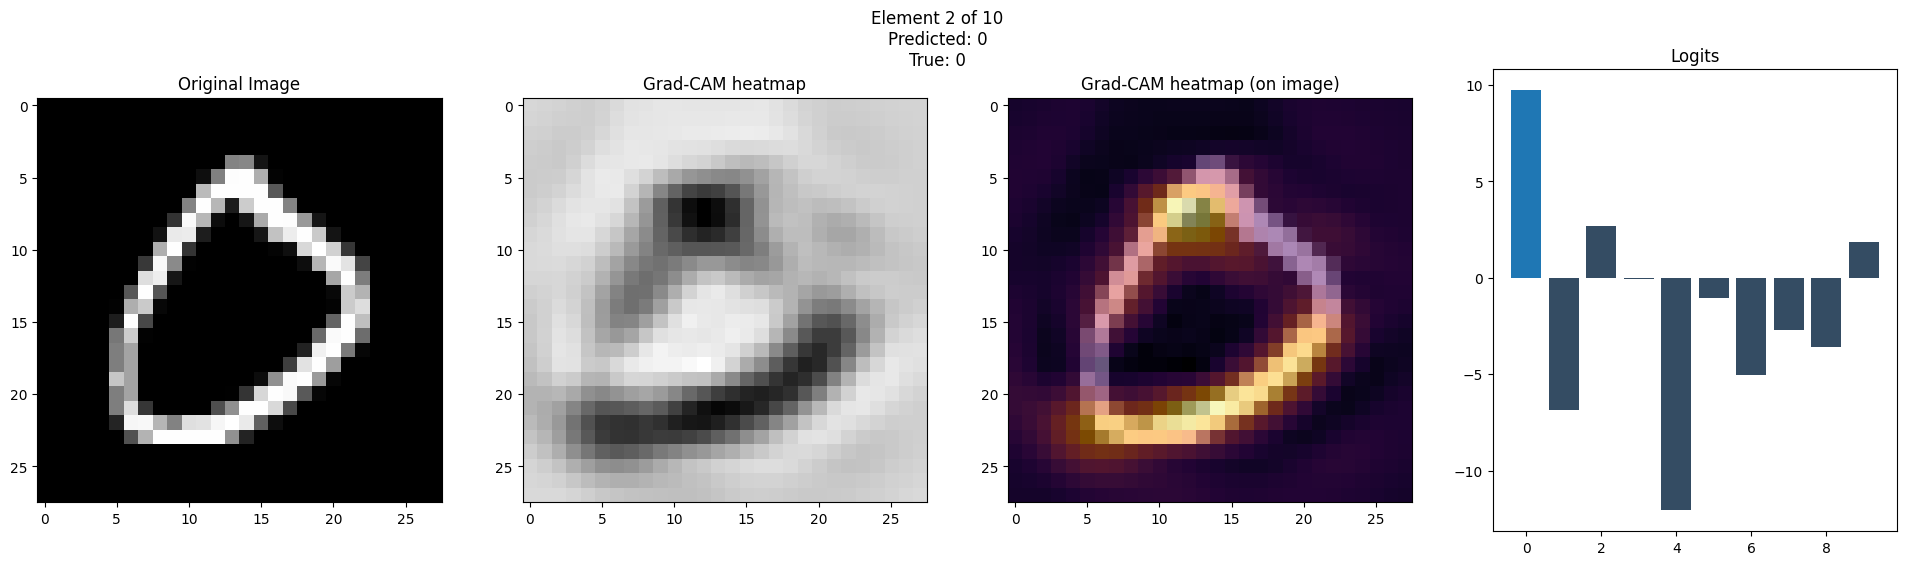

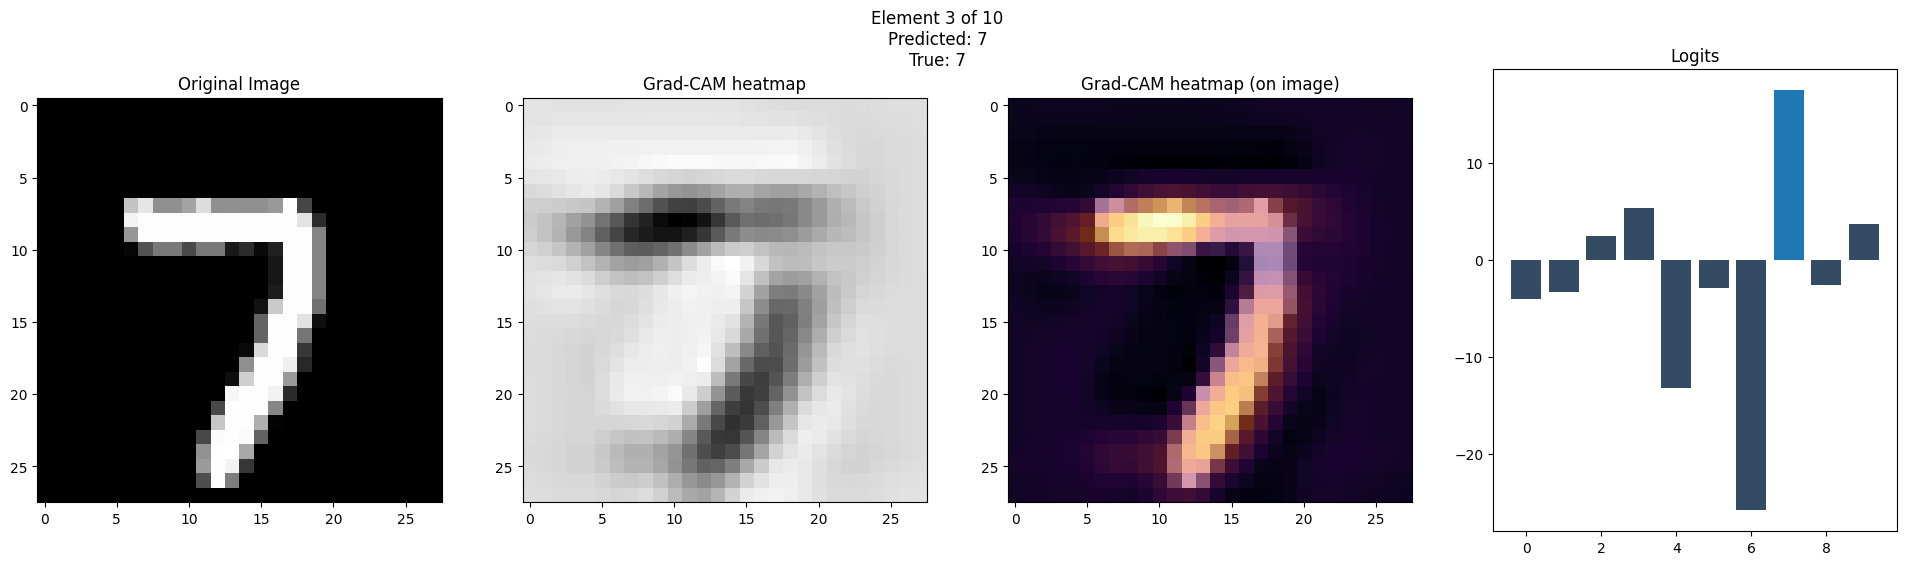

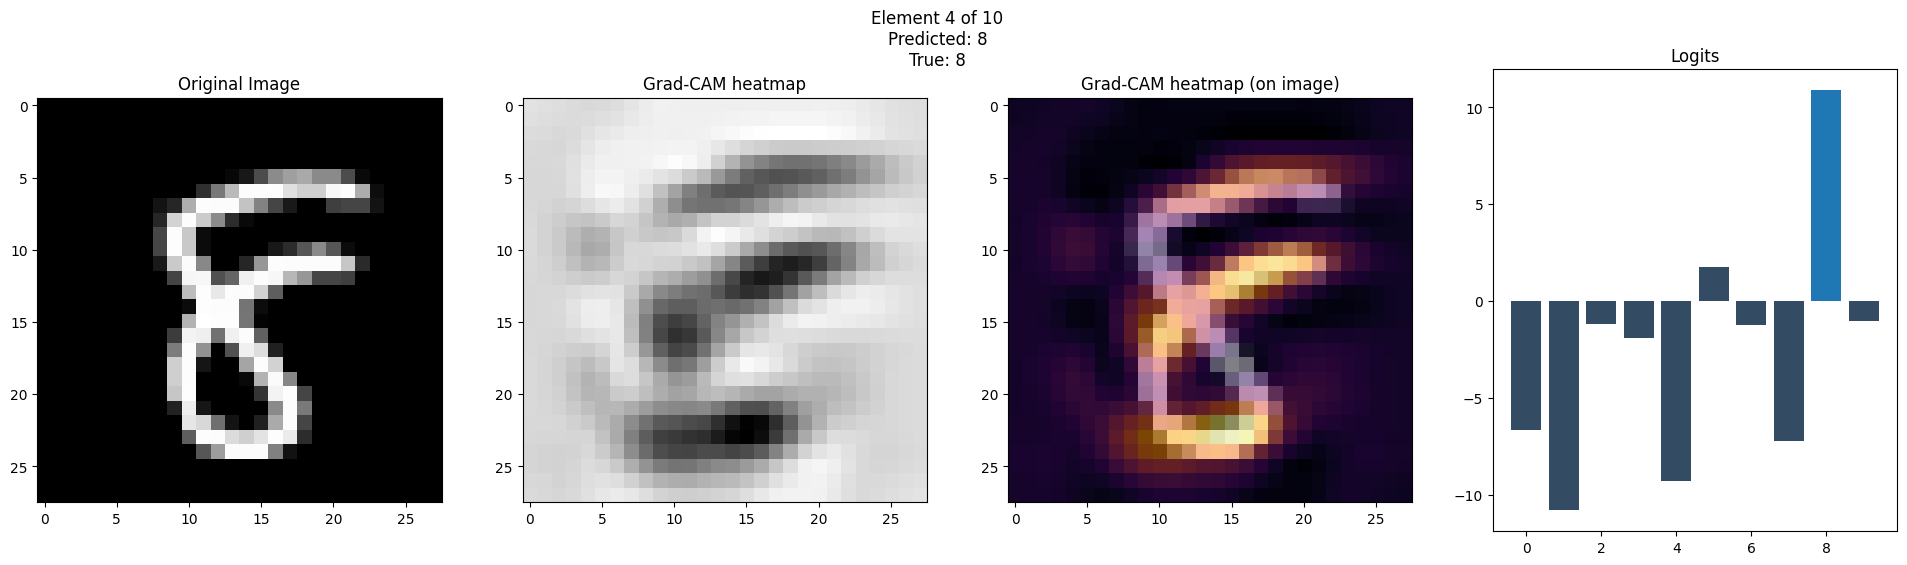

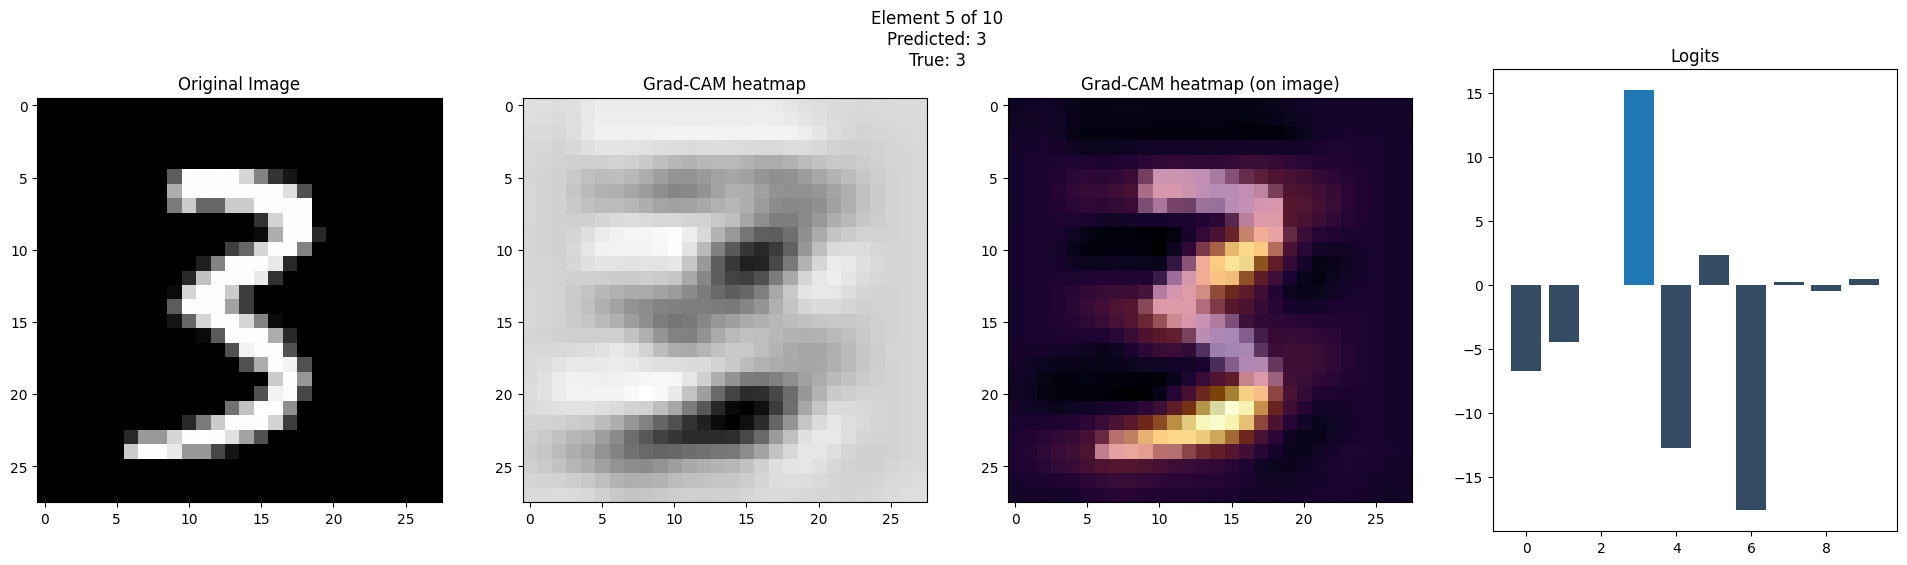

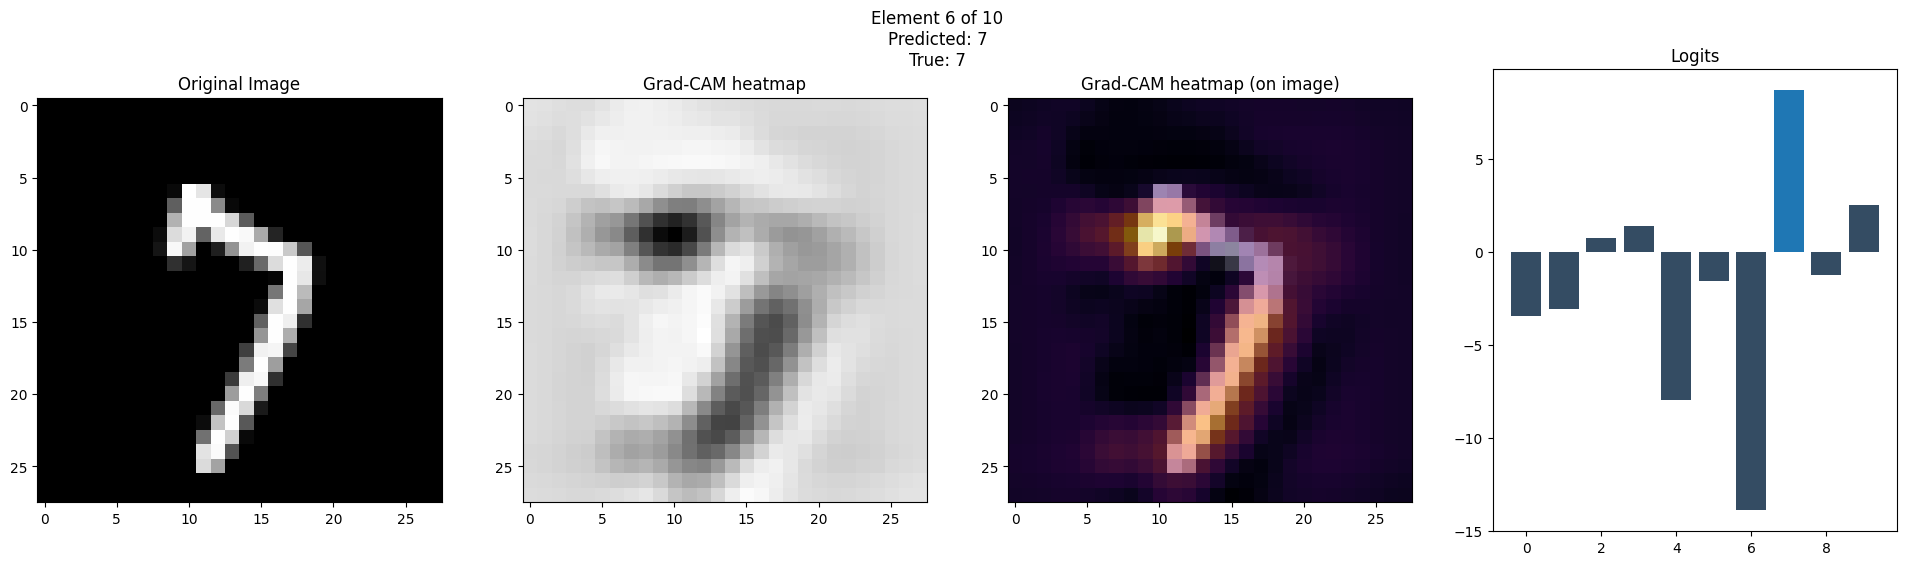

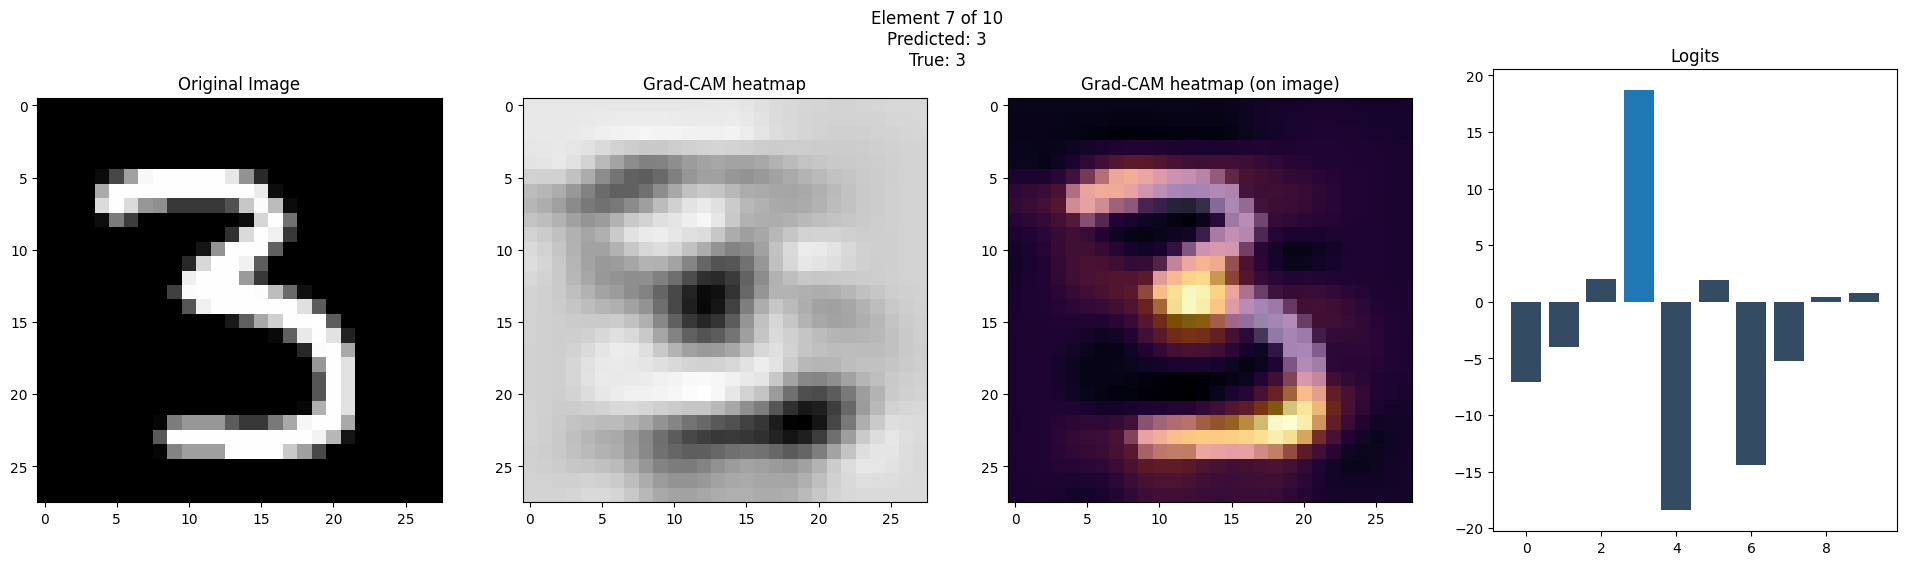

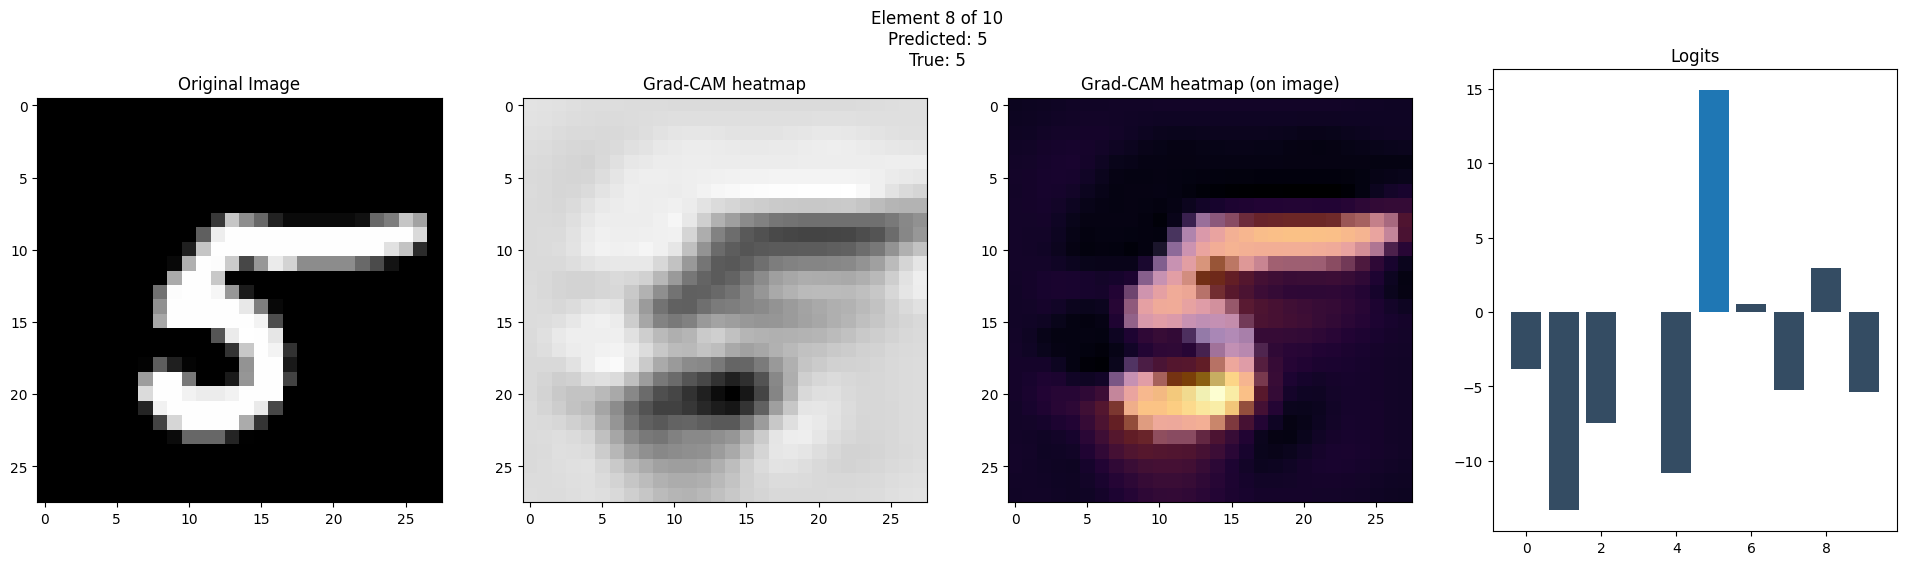

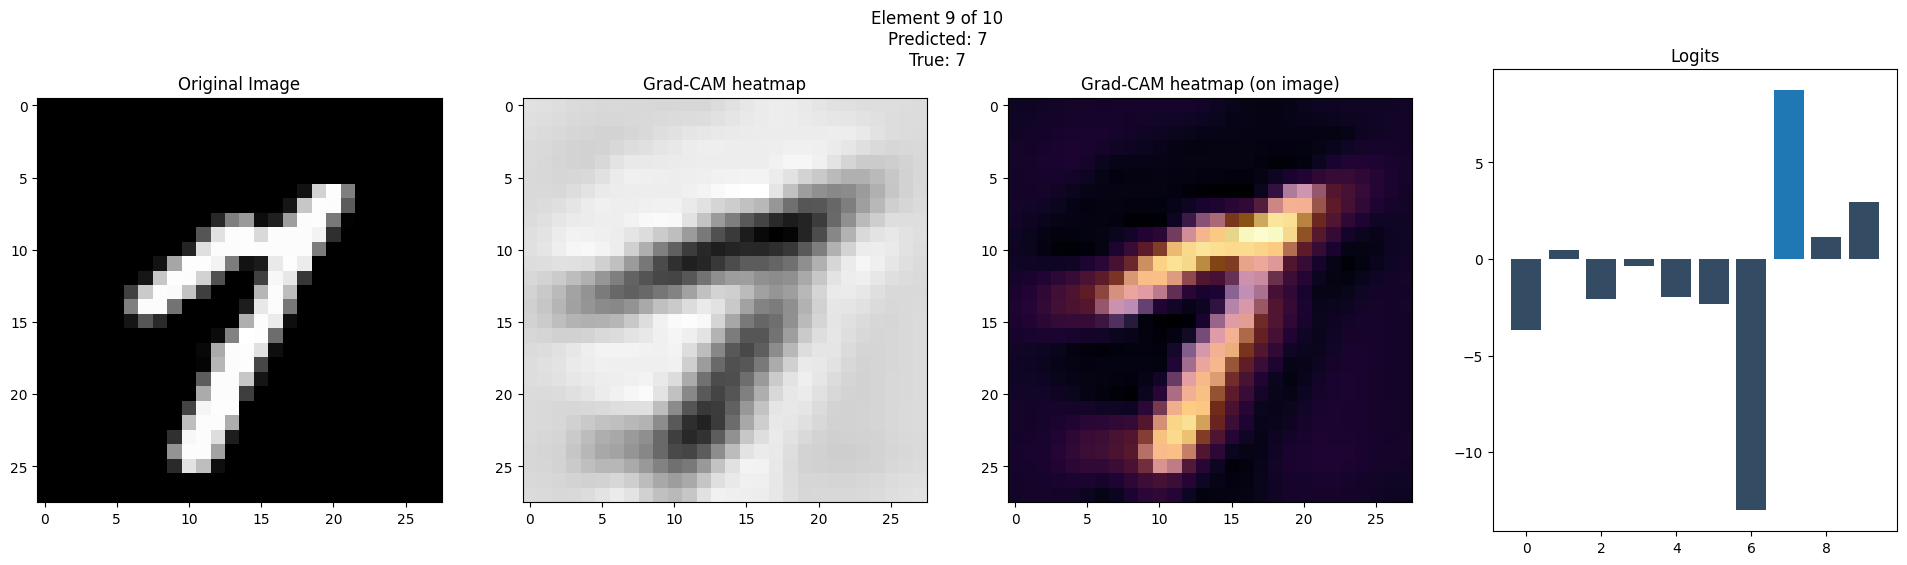

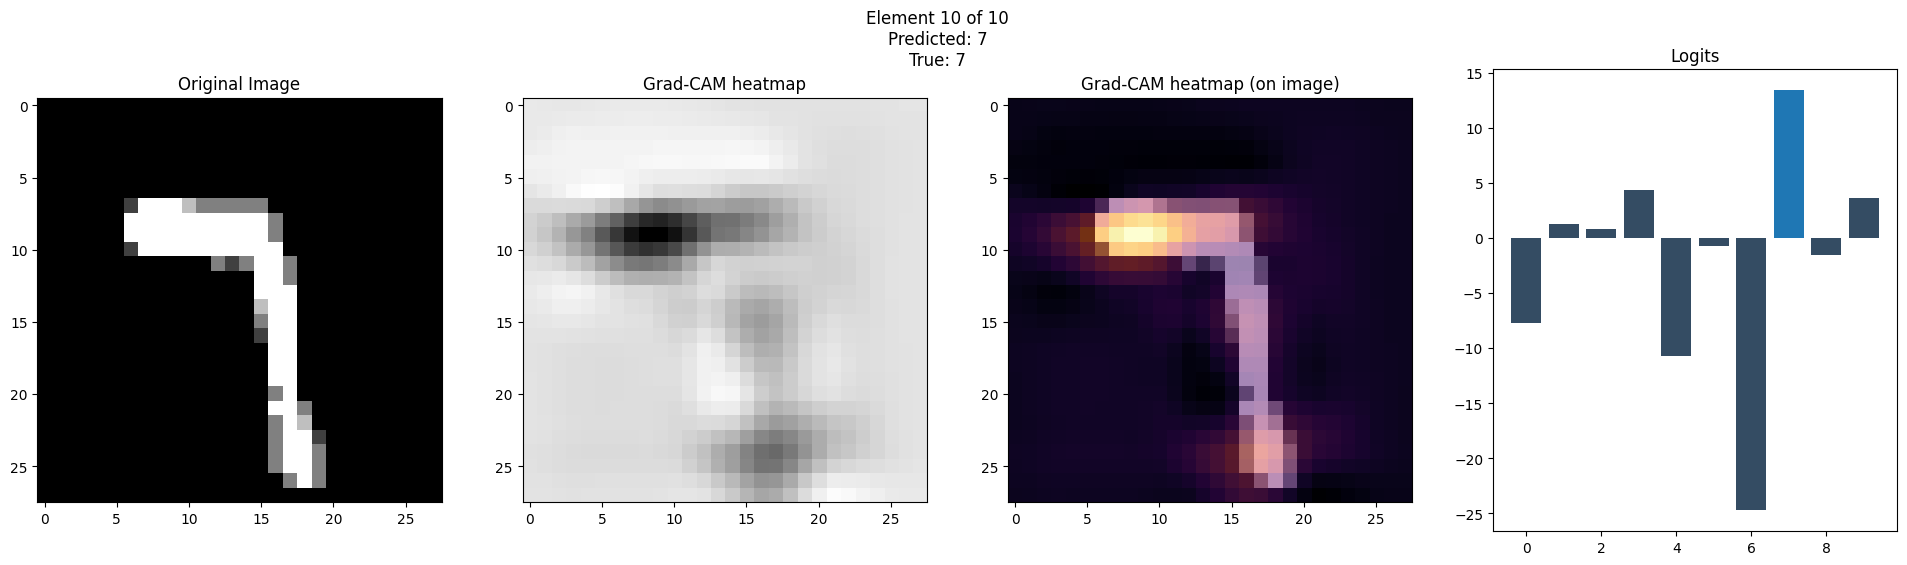

In [168]:
validation_batch = DataLoader(dataset_test, batch_size=INTERPRETATION_BATCH_SIZE, num_workers=2, shuffle=True)

x_batch, y_batch = next(validation_batch._get_iterator())

images = []
heatmaps = []

for n in range(INTERPRETATION_BATCH_SIZE):
    x_sample = x_batch[n].unsqueeze(0)

    y_true_sample = y_batch[n].squeeze(0)
    y_pred_sample_logits = classifier.forward(x_sample).detach().squeeze()
    y_pred_sample = y_pred_sample_logits.argmax()
    
    heatmap = build_heatmap(classifier, x_sample, c=y_pred_sample)
    x_sample = x_sample.squeeze(0).squeeze(0)
    
    fig, ax = plt.subplots(1, 4, figsize=(24, 6))

    fig.suptitle(f'Element {n + 1} of {INTERPRETATION_BATCH_SIZE}\nPredicted: {y_pred_sample}\nTrue: {y_true_sample}')

    ax[0].set_title("Original Image")
    ax[0].imshow(x_sample)
    ax[1].set_title("Grad-CAM heatmap")
    ax[1].imshow(-F.interpolate(heatmap.unsqueeze(0).unsqueeze(0), scale_factor=2, mode='bicubic')[0][0])
    ax[2].set_title("Grad-CAM heatmap (on image)")
    
    scaled_heatmap = F.interpolate(heatmap.unsqueeze(0).unsqueeze(0), scale_factor=2, mode='bicubic')[0][0]
    
    ax[2].imshow(x_sample)
    ax[2].imshow(scaled_heatmap, alpha=0.5, cmap='inferno')
    ax[3].set_title(f"Logits")
    ax[3].bar(x=torch.arange(0, 10), height=y_pred_sample_logits, color=COLOR_NEUTRAL)
    ax[3].bar(x=y_pred_sample, height=max(y_pred_sample_logits))
    
    if y_pred_sample != y_true_sample:
        ax[3].bar(x=y_pred_sample, height=max(y_pred_sample_logits), width=1, color=COLOR_BAD)
        ax[3].bar(x=y_true_sample, height=y_pred_sample_logits[y_true_sample], width=1, color=COLOR_GOOD)

    images.append(x_sample)
    heatmaps.append(scaled_heatmap)


### Fidelity

Fidelity represents how far we would be from the original predictions if all "less necessary" pixels were thrown out. 

This implementation contains a lot of additinal pretty-print, which can be disabled if ```verbose=True``` isn't specified.

In [171]:
def fidelity(net, image, heatmap, threshold = 5/6, verbose=False):
    acc = 0
    with torch.no_grad():
        f_x = net.forward(image.unsqueeze(0).unsqueeze(0))
        threshold_brightness = (torch.amax(heatmap) * threshold).item()
        masked_image = image.clone()
        masked_image[heatmap < threshold_brightness] = 0
        f_xm = net.forward(masked_image.unsqueeze(0).unsqueeze(0))
        
        if (verbose):
            fig, ax = plt.subplots(1, 5, figsize=(20, 6))
            fig.suptitle(f'Fidelity calculation\nPredicted on original image:{f_x.argmax().item()}\nPredicted on mask:{f_xm.argmax().item()}\nThreshold:{threshold}')
            ax[0].imshow(image)
            ax[0].set_title('Original image')
            ax[1].imshow(heatmap)
            ax[1].set_title('Heatmap')
            ax[2].imshow(masked_image)
            ax[2].set_title('Masked image')
            ax[3].bar(torch.arange(0, 10), f_x[0])
            ax[3].set_title('Original image logits')
            ax[3].set_box_aspect(1)

            ax[4].bar(torch.arange(0, 10), f_xm[0])
            ax[4].set_title('Masked image logits')
            ax[4].set_box_aspect(1)

        return [f_x.squeeze(0), f_xm.squeeze(0), (f_x - f_xm).mean().item()]

### Calculating fidelity on the batch

Given the batch we've retrieved heatmaps for, we now get fidelity for each element and display mean and dispertion

In [184]:
fidelities = torch.zeros(INTERPRETATION_BATCH_SIZE)
original_logits = []
masked_logits = []

threshold = 1/2
for n in range(len(x_batch)):
    x_sample = x_batch[n].squeeze(0, 1, 2)
    o, m, fidelities[n] = fidelity(classifier, x_sample, scaled_heatmap, threshold)
    
    original_logits.append(o)
    masked_logits.append(m)

f_mean = fidelities.mean().item()
D = ((fidelities - torch.full(fidelities.shape, f_mean))**2).mean()
print(f'Mean fidelity: {f_mean}')
print(f'D: {D}')

Mean fidelity: -1.671494722366333
D: 0.35634204745292664


### Example

Pick a random image, get its masked variant and compare original and masked prediction logits

-0.4685973525047302

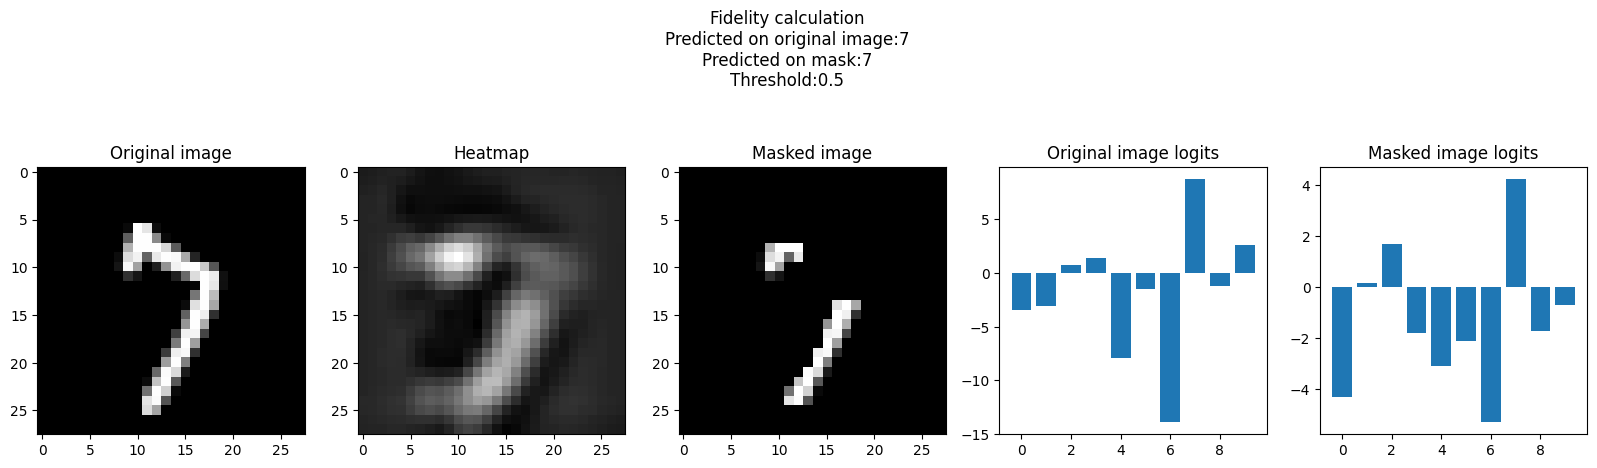

In [186]:
n = random.randint(0, len(images) - 1)
logits_orig, logits_masked, mean = fidelity(classifier, images[n], heatmaps[n], threshold, True)
mean